**Load the required libraries and packages**

In [1]:
# libraries 
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
# Data 
appointment_df = pd.read_csv("../data/Appointments List.csv", 
                             encoding='UTF-16', delimiter="\t")

/tmp/ipykernel_20737/1529740636.py:2: DtypeWarning: Columns (0,3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  appointment_df = pd.read_csv("../data/Appointments List.csv",


**Objectives**

- rate of cancelled MH infusion appointments with time
- Compare ration of cancelled appointments with successfull ones over time
- if cancellation increased (skyrocketed) what may have led. If that is the case - book a call with COO and look into the process of booking appointments 
- Is cancelled appointment (MH infusion) the first one 

# Explanatory Data Analysis
## Data Assessment and Preparation

In [3]:
appointment_df.head()

,Appointment UID,Appt Status Description,Date Of Service,Chartnumber,NurseName,FirstTreatmentApptInd,Appt Type Group,Appt Type,Created By,Provider,Facility City,Room,Column Heading,#,Count of tblAppointments,Patient FID
0,Grand Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,"55,975",*
1,1,Made,01/01/00,NaN,NaN,N,Default,NaN,system,",",NaN,Other,NaN,1,1,1
2,109,Seen,01/22/18,1,NaN,N,Intake,TMS INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,2,1,"5,283"
3,239,Seen,01/22/18,2,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,3,1,"5,286"
4,240,Made,01/22/18,9,NaN,N,Intake,TMS INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,4,1,"5,351"


In [4]:
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55976 entries, 0 to 55975
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Appointment UID           55976 non-null  object
 1   Appt Status Description   55976 non-null  object
 2   Date Of Service           37250 non-null  object
 3   Chartnumber               55975 non-null  object
 4   NurseName                 19321 non-null  object
 5   FirstTreatmentApptInd     54678 non-null  object
 6   Appt Type Group           54678 non-null  object
 7   Appt Type                 54677 non-null  object
 8   Created By                55976 non-null  object
 9   Provider                  55976 non-null  object
 10  Facility City             51738 non-null  object
 11  Room                      55976 non-null  object
 12  Column Heading            54697 non-null  object
 13  #                         55976 non-null  object
 14  Count of tblAppointmen

In [5]:
# Drop the first two rows
appointment_df.drop(index=[0, 1], inplace=True)
appointment_df.reset_index(drop=True, inplace=True)

## Data Analysis and Visualization

<Axes: xlabel='Appt Status Description'>

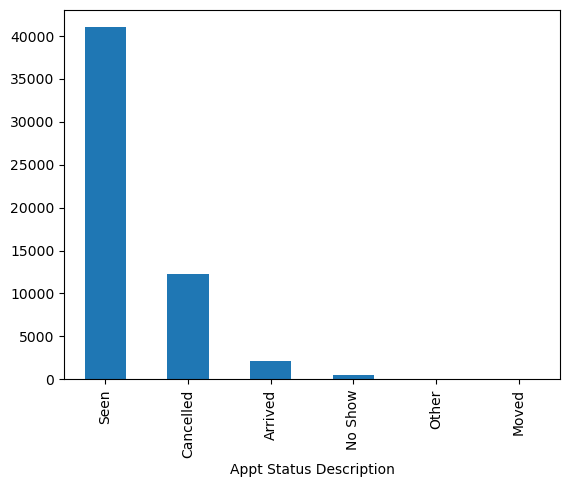

In [6]:
# Replace "Made" to "Seen" and "Deleted" to "Cancelled"
appointment_df["Appt Status Description"].replace({
    "Made":"Seen",
    "Deleted": "Cancelled"
}, inplace=True)

appointment_df["Appt Status Description"].value_counts().plot(kind = "bar")

There was a total of approximately 12000 appointments which is nearly a fifth of the total appointments, therefore cancellations is crucial factor for inspecting why the MH infusion rate dropped. 

Lets compare the cancelled appointments with the other types particularly for MH infusion

<Axes: xlabel='Appt Status Description'>

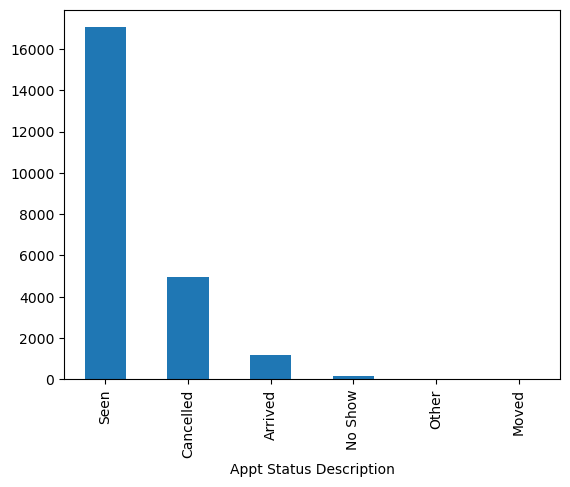

In [7]:
mh_infusion_df = appointment_df[appointment_df["Appt Type Group"]=='MH Infusion'].reset_index(drop=True)
mh_infusion_df["Appt Status Description"].value_counts().plot(kind = "bar")

There was a total of approximately 5000 cancelled appointments on MH infusion only which is nearly a quarter of the total cancelled appointments

### Cancellation of MH infusion with time

In [8]:
cancelled_mhInfusion_df = mh_infusion_df[mh_infusion_df["Appt Status Description"]=="Cancelled"].reset_index(drop=True)
cancelled_mhInfusion_df.head()

,Appointment UID,Appt Status Description,Date Of Service,Chartnumber,NurseName,FirstTreatmentApptInd,Appt Type Group,Appt Type,Created By,Provider,Facility City,Room,Column Heading,#,Count of tblAppointments,Patient FID
0,256,Cancelled,02/02/18,2,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,19,1,"5,286"
1,377,Cancelled,NaN,31,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,46,1,"5,420"
2,384,Cancelled,NaN,72,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,52,1,"5,378"
3,385,Cancelled,NaN,83,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,53,1,"5,371"
4,386,Cancelled,NaN,45,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,54,1,"5,409"


In [9]:
cancelled_mhInfusion_df["Date Of Service"].isna().sum()/cancelled_mhInfusion_df.shape[0]

0.9567851373182552

More than 95% of cancelled MH infusion appointments have missing dates therefore this analysis is aborted

In [10]:
cancelled_mhInfusion_df["Count of tblAppointments"].value_counts()

Count of tblAppointments
1    3058
1    1894
Name: count, dtype: int64

In [11]:
mh_infusion_df["Count of tblAppointments"].value_counts()

Count of tblAppointments
1    13766
1     9589
Name: count, dtype: int64